#Problema Gravitacional de los N-Cuerpos

Las ecuaciones de movimiento de N-partículas moviendose bajo su interacción gravitacional mutua se pueden escribir en la forma
\begin{equation}
    m_i\ddot{x}_i=-Gm_i\sum^N_{j=1,\;i\neq j}\frac{m_j}{|x_{ij}|^2}\hat{x}_{ij},
\end{equation}

donde $x_{ij} = x_i - x_j$ es el vector que apunta desde la partícula j a la partícula i.

# 1.

Implemente un programa que resuelva el problema diferencial de las ecuaciónes de movimiento utilizando un método simplectico de orden 4. El algoritmo debe ser lo suficientemente general para poder incluír un número arbitrario de partículas y las condiciones iniciales deben ser leídas de un archivo.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_initial_condition(file, flag):
    (x, y, z, vx, vy, vz, mass) = np.loadtxt(file, unpack=True)

    if flag == 0:
      # Convertir unidades
      x /= 1.495e11
      y /= 1.495e11
      z /= 1.495e11
      vx *= 3.154e7 / 1.495e11
      vy *= 3.154e7 / 1.495e11
      vz *= 3.154e7 / 1.495e11
      mass /= 1.988e30

    return x, y, z, vx, vy, vz, mass

def initialize_system(x, y, z, vx, vy, vz, n, N):
    G = 4. * np.pi**2
    bodies = np.zeros([n, N, 6])

    bodies[0, :, 0] = x
    bodies[0, :, 1] = y
    bodies[0, :, 2] = z
    bodies[0, :, 3] = vx
    bodies[0, :, 4] = vy
    bodies[0, :, 5] = vz

    return bodies, G

inicial_condition = "sun_earth.dat"

# Lee las condiciones iniciales desde el archivo
x, y, z, vx, vy, vz, mass = read_initial_condition(inicial_condition,0)

# Define las condiciones iniciales y parámetros
ti = 0
tf = 100
n = 20000
N = len(mass)

# Inicializa el sistema
bodies, G = initialize_system(x, y, z, vx, vy, vz, n, N)

times = np.linspace(ti, tf, n)
h = (tf - ti) / n


In [133]:
def force(ti,o_bodies):
    n_bodies = np.zeros(o_bodies.shape)
    n_bodies[:, 0:3] = o_bodies[:, 3:]

    for i in range(0, N):
        distance = o_bodies[i, 0:3] - o_bodies[:, 0:3]
        r = np.sqrt(np.sum(distance * distance, axis=1))
        r[i] = 1
        n_bodies[i, 3] = -G * np.sum(distance[:, 0] * mass / (r**3))
        n_bodies[i, 4] = -G * np.sum(distance[:, 1] * mass / (r**3))
        n_bodies[i, 5] = -G * np.sum(distance[:, 2] * mass / (r**3))

    return n_bodies

def RK4(h, ti, o_bodies):
    k1 = h * force(ti, o_bodies)
    k2 = h * force(ti + h/2., o_bodies + k1/2.)
    k3 = h * force(ti + h/2., o_bodies + k2/2.)
    k4 = h * force(ti + h, o_bodies + k3)
    n_bodies = o_bodies + (k1 + 2. * k2 + 2. * k3 + k4) / 6.
    return n_bodies

In [134]:
for i in range(n-1):
  bodies[i+1] = RK4(h, times[i], bodies[i])

lim = max(abs(np.amax(bodies[:,:,0:3])), abs(np.amin(bodies[:,:,0:3])))*(1+0.1)

## 2.

Con el fin de probar el código implementado, utilice los datos iniciales para el sistema SolTierra dados en el archivo sun_earth.dat y grafique el comportamiento del sistema a lo largo de algunos años. Compruebe que la orbita no se comporta a la forma de una espiral.

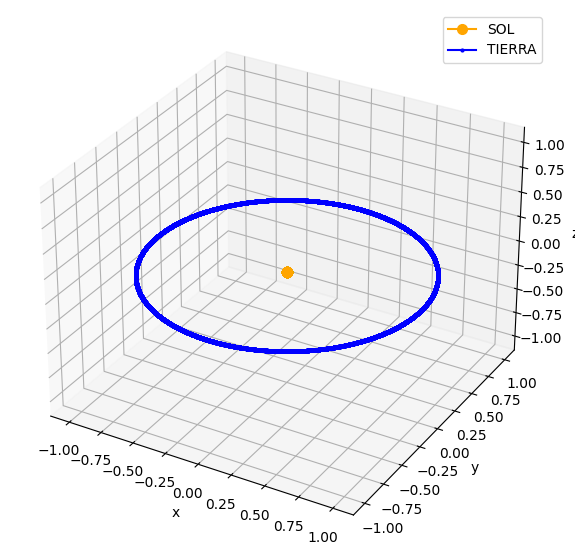

In [139]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.plot(bodies[:,0,0],bodies[:,0,1],bodies[:,0,2], label='SOL', color = "orange", markersize= 7, marker= "o")
ax.plot(bodies[:,1,0],bodies[:,1,1],bodies[:,1,2], label='TIERRA', color = "blue", markersize= 2, marker= "o")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.legend()
plt.show()

In [ ]:
step = 1
n_fin = 200
for t in range(200):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(bodies[t,0,0],bodies[t,0,1],bodies[t,0,2], label="SOL", color = "orange", marker='o', s=30)
    ax.scatter(bodies[t,1,0],bodies[t,1,1],bodies[t,1,2], label="TIERRA", color = "green", marker='o', s=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim3d(-lim, lim)
    ax.set_ylim3d(-lim, lim)
    ax.set_zlim3d(-lim, lim)
    ax.legend()
    filename = f"frame_{t}.png"
    plt.savefig(filename)

In [45]:
import imageio
import os
# Crear el GIF
images = [imageio.imread(f"frame_{t}.png") for t in range(0, 200, 1)]
imageio.mimsave('animation.gif', images, duration=0.05)

# Borrar archivos de imagen temporales
for t in range(0,n_fin, step):
    filename = f"frame_{t}.png"
    if os.path.exists(filename):
        os.remove(filename)

<ipython-input-45-72f38f4cb0b5>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f"frame_{t}.png") for t in range(0, 200, 1)]


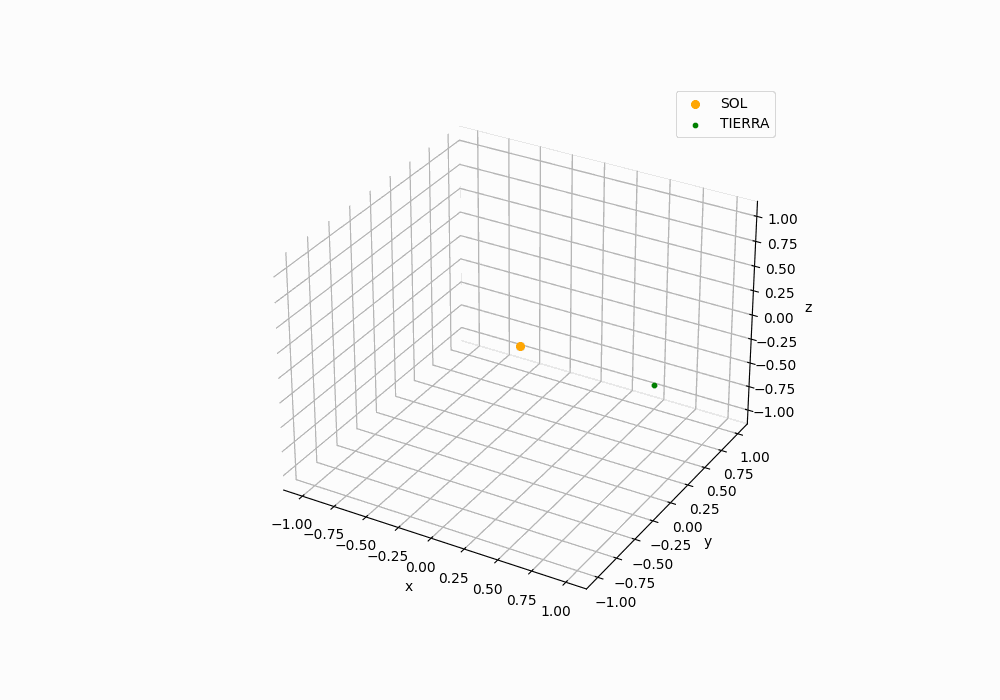

Para muchos años...

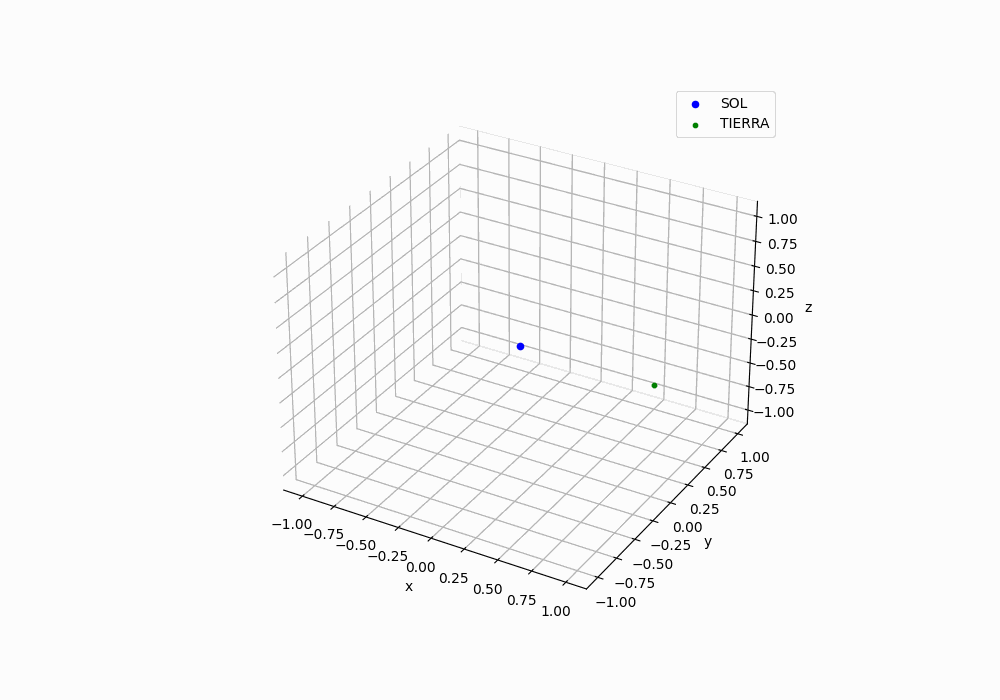

## 3.

Con el fin de asegurar la convergencia del algoritmo, implemente una rutina dentro del programa que calcule la energía total del sistema de N-partículas. Evalue el comportamiento de la energía a lo largo de la evolución y grafique para comprobar si existe algun cambio significativo. El comportamiento mejora o empeora al modificar el paso de la integración?

In [206]:
inicial_condition = "sun_earth.dat"

# Lee las condiciones iniciales desde el archivo
x, y, z, vx, vy, vz, mass = read_initial_condition(inicial_condition,0)

# Define las condiciones iniciales y parámetros
ti = 0
tf = 100
N = len(mass)

In [203]:
import numpy as np

def calcular_energia_total(o_bodies, mass):
    G = 4. * np.pi**2

    n_cuerpos, _ = o_bodies.shape
    E_cinetica = 0.0
    E_potencial = 0.0

    for i in range(len(mass)):
        # Calcular la energía cinética para cada cuerpo
        masa = mass[i]
        velocidad = o_bodies[i, 3:6]  # Las velocidades están en las columnas 3, 4, y 5
        E_cinetica += 0.5 * masa * np.dot(velocidad, velocidad)

        # Calcular la energía potencial con respecto a los demás cuerpos
        for j in range(n_cuerpos):
            if i != j:
                # Calcular la distancia entre los centros de masa
                delta_r = o_bodies[j, 0:3] - o_bodies[i, 0:3]
                distancia = np.linalg.norm(delta_r)

                # Calcular la energía potencial gravitacional
                masa_j = mass[j]
                E_potencial += -G * masa * masa_j / distancia

    # Sumar la energía cinética y la energía potencial para obtener la energía total
    E_total = E_cinetica + E_potencial

    return E_cinetica, E_potencial, E_total

In [204]:
n = 2000

# Inicializa el sistema
bodies, G = initialize_system(x, y, z, vx, vy, vz, n, N)
times = np.linspace(ti, tf, n)
h = (tf - ti) / n

for i in range(n-1):
  bodies[i+1] = RK4(h, times[i], bodies[i])

lim = max(abs(np.amax(bodies[:,:,0:3])), abs(np.amin(bodies[:,:,0:3])))*(1+0.1)

# Calcular la energía total del sistema
E_cinetica = []
E_potencial = []
E_total = []

for i in range(n-1):
  E_c, E_p, E_t = calcular_energia_total(bodies[i], mass)
  E_cinetica.append(E_c)
  E_potencial.append(E_p)
  E_total.append(E_t)

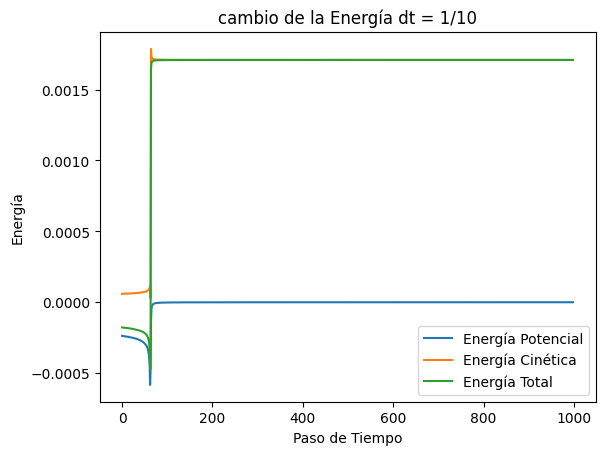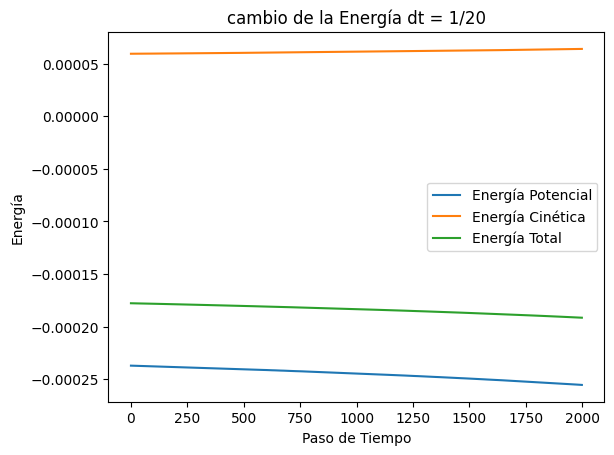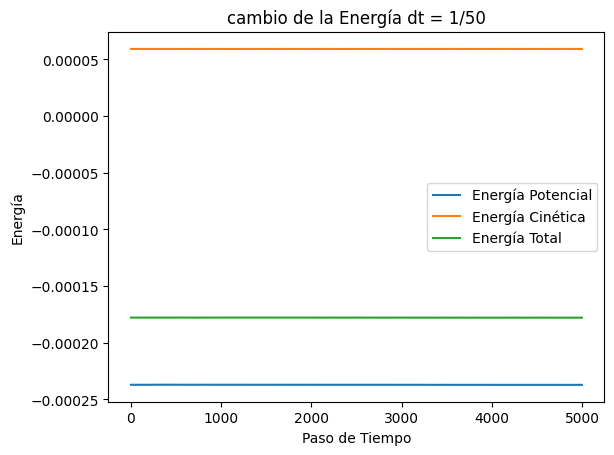

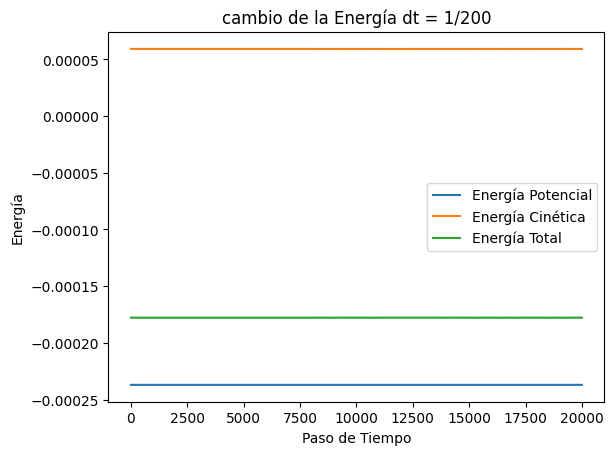

In [187]:
eje_x = np.arange(0, len(E_total),1)

# Graficar las tres energías en la misma figura
plt.plot(eje_x, E_potencial, label='Energía Potencial')
plt.plot(eje_x, E_cinetica, label='Energía Cinética')
plt.plot(eje_x, E_total, label='Energía Total')

# Configuración del gráfico
plt.xlabel('Paso de Tiempo')
plt.ylabel('Energía')
plt.title('cambio de la Energía dt = 1/200')
#plt.xlim(0, 5000)
plt.legend()
plt.show()

#Grafica con dt= 100/20000= 1/200

Como se observa en las graficas, si se observa una mejora significativa en la conservación de la energía. Sin embargo, ya para valores muy grandes no se observan mejoras significativas

## 4.

Ahora utilice su código para estudiar la evolución del sistema de 13 estrellas S0 moviendose alrededor del agujero negro supermasivo SgrA*, proporcionado en el archivo S0stars.dat. Verifique también el comportamiento de la energía del sistema de 13+1 partículas. Grafique las orbitas de estas estrellas a lo largo de un periodo de al menos 100 años.

In [96]:
inicial_condition = "S0stars.dat"

# Lee las condiciones iniciales desde el archivo
x, y, z, vx, vy, vz, mass = read_initial_condition(inicial_condition,1)
x *= 8000
y *= 8000
z *= 8000
vx *= 8000
vy *= 8000
vz *= 8000

# Define las condiciones iniciales y parámetros
ti = 0
tf = 100
n = 40000
N = len(mass)

# Inicializa el sistema
bodies, G = initialize_system(x, y, z, vx, vy, vz, n, N)

# Resto del código sigue igual
times = np.linspace(ti, tf, n)
h = (tf - ti) / n

In [94]:
for i in range(n-1):
  bodies[i+1] = RK4(h, times[i], bodies[i])

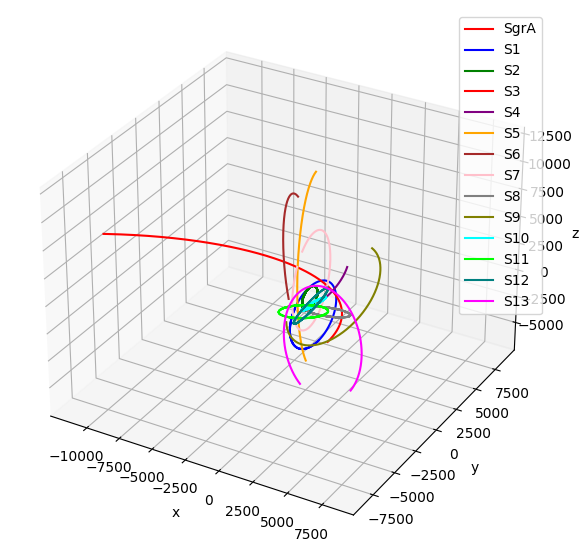

In [95]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.plot(bodies[:,0,0],bodies[:,0,1],bodies[:,0,2], color=('red'), label='SgrA')

colors = ["blue", "green", "red", "purple", "orange", "brown", "pink", "gray", "olive", "cyan", "lime", "teal", "magenta"]
for i in range(1,len(mass)):
  ax.plot(bodies[:,i,0],bodies[:,i,1],bodies[:,i,2], color=colors[i-1], label=f'S{i}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

## 5.

Modifique el código para incorporar el método de Verlet para solucionar el problema y resuelva de nuevo para el sistema de las 13 estrellas S0 moviendose alrededor de SgrA*. Mejora el tiempo de computo utilizando este método? Se conserva la energía total del sistema?

In [130]:
def force(o_bodies):
    for i in range(0, N):
        distance = o_bodies[i, 0:3] - o_bodies[:, 0:3]
        r = np.sqrt(np.sum(distance * distance, axis=1))
        r[i] = 1
        ax = -G * np.sum(distance[i, 0] * mass[i] / (r**3))
        ay = -G * np.sum(distance[i, 1] * mass[i] / (r**3))
        az = -G * np.sum(distance[i, 2] * mass[i] / (r**3))

    return ax,ay,az

def verlet(dt, o_bodies):
  n_bodies = np.zeros(o_bodies.shape)
  for i in range(0, N):
    ax, ay, az = force (bodies)
    # Calcular las nuevas posiciones
    n_bodies[i,0] = o_bodies[i,0] + o_bodies[i,3] * dt + 0.5 * ax * dt**2
    n_bodies[i,1] = o_bodies[i,1] + o_bodies[i,4] * dt + 0.5 * ay * dt**2
    n_bodies[i,2] = o_bodies[i,2] + o_bodies[i,5] * dt + 0.5 * az * dt**2
    # Calcular las aceleraciones en las nuevas posiciones
    ax_new, ay_new, az_new = force (o_bodies)
    # Calcular las nuevas velocidades
    n_bodies[i,3] = o_bodies[i,3] + 0.5 * (ax + ax_new) * dt
    n_bodies[i,3] = o_bodies[i,3] + 0.5 * (ay + ay_new) * dt
    n_bodies[i,3] = o_bodies[i,3] + 0.5 * (az + az_new) * dt
  print(n_bodies)
  return n_bodies

In [ ]:
for i in range(n-1):
  bodies[i+1] = verlet(h, bodies[i])

lim = max(abs(np.amax(bodies[:,:,0:3])), abs(np.amin(bodies[:,:,0:3])))*(1+0.1)